# Gradient boosting with your own hands

**Attention:** there have been changes in the text of the task - the number of trees has changed (now 50), the rule for changing the step value in task 3 and the `random_state` parameter for the decision tree has been added. The correct answers have not changed, but now they are easier to get. A typo in the `gbm_predict` function has also been fixed.

This task will use the `boston` dataset from `sklearn.datasets`. Leave the last 25% of the objects for quality control by dividing `X` and `y` into `X_train`, `y_train` and `X_test`, `y_test`.

The purpose of the task will be to implement a simple version of gradient boosting over regression trees for the case of a quadratic loss function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, tree, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
boston = datasets.load_boston()
X, y = boston.data, boston.target

X_train = X[:int(X.shape[0]*0.75),:]
X_test = X[int(X.shape[0]*0.75):,:]
y_train = y[:int(X.shape[0]*0.75)]
y_test = y[int(X.shape[0]*0.75):]

In [4]:
def write_answer(answer, file_name):
    with open(file_name, "w") as fout:
        fout.write(str(answer))

## Task 1

As you already know from the lectures, **boosting** is a method of constructing compositions of basic algorithms by sequentially adding a new algorithm with a certain coefficient to the current composition. 

Gradient boosting trains each new algorithm so that it approximates the anti-gradient of the error by the composition responses on the training sample. Similarly to the minimization of functions by gradient descent, in gradient boosting we correct the composition by changing the algorithm in the direction of the anti-gradient of the error.

Use the formula from the lectures that sets the answers to the training sample for which the new algorithm needs to be trained (in fact, this is just a slightly more detailed gradient from the error), and get a special case of it if the loss function `L` is the square of the deviation of the composition `a(x)` response from the correct answer `y` to given `x`.

If you have not considered the derivative yourself for a long time, the table of derivatives of elementary functions (which is easy to find on the Internet) and the rule of differentiation of a complex function will help you. After differentiating the square, you will have a multiplier of 2 — because we still have to choose the coefficient with which the new basic algorithm will be added, ignore this multiplier in the further construction of the algorithm.

In [8]:
def L(y, z):
    return z - y

## Task 2

Create an array for the `DecisionTreeRegressor` objects (we will use them as basic algorithms) and for real numbers (these will be coefficients before the basic algorithms). 

In the loop, train 50 decision trees sequentially with the parameters `max_depth=5` and `random_state=42` (the other parameters are by default). Hundreds and thousands of trees are often used in boosting, but we will limit ourselves to 50 so that the algorithm works faster and it is easier to debug (because the purpose of the task is to figure out how the method works). Each tree should be trained on the same set of objects, but the answers that the tree learns to predict will change in accordance with the rule obtained in task 1. 

Try to start by always taking a coefficient equal to 0.9. It is usually justified to choose a coefficient much smaller - about 0.05 or 0.1, but since in our training example there will be only 50 trees on a standard dataset, let's take a bigger step to begin with.

In the process of implementing the training, you will need a function that will calculate the forecast of the currently constructed composition of trees on the sample `X`:

```
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]
(we assume that base_algorithms_list is a list with basic algorithms, and coefficients_list is a list with coefficients before algorithms)
```

The same function will help you to get a forecast on the control sample and evaluate the quality of your algorithm using `mean_squared_error` in `sklearn.metrics`. 

Raise the result to the power of 0.5 to get `RMSE`. The resulting value of `RMSE` is **the answer in paragraph 2**.

In [1]:
def gbm_predict(X): 
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X] 
    #(we assume that base_algorithms_list is a list with basic algorithms, and coefficients_list is a list with coefficients before the algorithms)


In [11]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in
                 zip(base_algorithms_list, coefficients_list)]) for x in X]

base_algorithms_list = list()
coefficients_list    = list()
y_cur = np.array(y_train)
for i in range(50):
    regressor = tree.DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_cur)
    base_algorithms_list.append(regressor)
    coefficients_list.append(0.9)
    
    y_cur = L(gbm_predict(X_train), y_train)
    
error = np.sqrt(mean_squared_error(y_test, gbm_predict(X_test)))
write_answer(error, 'answer_2.txt')
print(error)

5.455623403859612


## Task 3

You may also be concerned that moving with a constant step, near the minimum of the error, the answers in the training sample change too sharply, jumping over the minimum. 

Try to reduce the weight before each algorithm with each next iteration using the formula `0.9 / (1.0 + i)`, where `i` is the iteration number (from 0 to 49). Use the quality of the algorithm as the **answer in paragraph 3**. 

In reality , the following step selection strategy is often used: as soon as the algorithm is selected, we select the coefficient in front of it by numerical optimization method so that the deviation from the correct answers is minimal. We will not suggest that you implement this to complete the task, but we recommend that you try to figure out such a strategy and implement it for yourself on occasion.

In [12]:
base_algorithms_list = list()
coefficients_list = list()
y_cur = np.array(y_train)
for i in range(50):
    regressor = tree.DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_cur)
    base_algorithms_list.append(regressor)
    coefficients_list.append(0.9 / (1.0 + i))
    
    y_cur = L(gbm_predict(X_train), y_train)

error = np.sqrt(mean_squared_error(y_test, gbm_predict(X_test)))
write_answer(error, 'answer_3.txt')
print(error)

4.812550945781193


## Task 4

The method you implemented - gradient boosting over trees - is very popular in machine learning. It is presented both in the `sklearn` library itself and in the third-party `XGBoost` library, which has its own python interface. In practice, `XGBoost` works noticeably better than `GradientBoostingRegressor` from `sklearn`, but you can use any implementation for this task. 

Investigate whether gradient boosting is retrained with an increase in the number of iterations (and think about why), as well as with an increase in the depth of trees. Based on the observations, write down the correct numbers of the statements given below, separated by a space, in ascending order of the number (this will be the **answer in paragraph 4**):

    1. With an increase in the number of trees, starting from some point, the quality of gradient boosting does not change significantly.

    2. With an increase in the number of trees, starting from some point, gradient boosting begins to retrain.

    3. As the depth of the trees increases, starting from some point, the quality of gradient boosting on the test sample begins to deteriorate.

    4. With the growth of the depth of trees, starting from some point, the quality of gradient boosting ceases to change significantly

Populating the interactive namespace from numpy and matplotlib
[8.814038583477592, 7.451904949335349, 6.752289155727839]
[8.235281334243622, 6.672159496002175, 5.815544345863425]
[8.60085780173012, 7.203194857681147, 6.404149203632535]
[8.838918243844535, 7.509532677987691, 6.754800818647786]
[8.984331847800611, 7.401716415501552, 6.723575179689815]
[8.599233632661175, 7.305954162362749, 6.525896308436802]


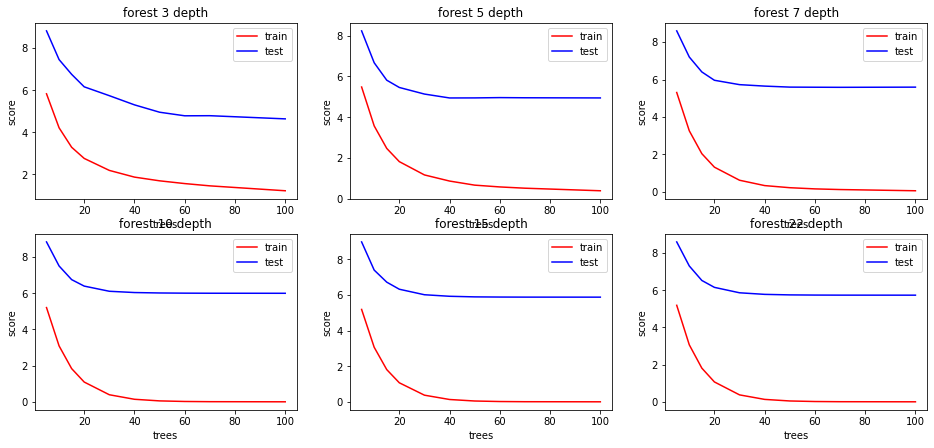

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
%pylab inline

trees = np.array([5, 10, 15, 20, 30, 40, 50, 60, 70, 100])
depths = np.array([3, 5, 7, 10, 15, 22])
plt.figure(figsize=(16, 11))
i = 1
for d in depths:
    scores_train, scores_test = list(), list()
    for num in trees:
        boost = GradientBoostingRegressor(n_estimators=num, max_depth=d, random_state=42).fit(X_train, y_train)
        scores_train.append(np.sqrt(mean_squared_error(y_train, boost.predict(X_train))))
        scores_test.append(np.sqrt(mean_squared_error(y_test, boost.predict(X_test))))
    print(scores_test[:3])
    ax = plt.subplot(3, 3, i)
    ax.set_title("forest {} depth".format(d))
    plt.plot(trees, scores_train, color="red", label="train")
    plt.plot(trees, scores_test, color="blue", label="test")
    plt.xlabel("trees")
    plt.ylabel("score")
    plt.legend()
    i += 1
write_answer('2 3', 'answer_4.txt')

## Task 5

Compare the quality obtained using gradient boosting with the quality of linear regression. 

To do this, train the `Linear Regression` from `sklearn.linear_model` (with default parameters) on the training sample and evaluate the predictions of the resulting algorithm on the test sample `RMSE'. The received quality is the answer in **point 5**. 

In this example, the quality of a simple model should have been worse, but do not forget that this does not always happen. In the assignments for this course, you will still find an example of the opposite situation.

In [14]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(X_train, y_train)
pred = regr.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, pred))
write_answer(error, 'answer_5.txt')
print(error)

8.25497975354915
